<a href="https://colab.research.google.com/github/joaospneto/Analise-dados-pandas/blob/main/notebook_pandas_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


___

## 1) Análise exploratória de dados

Uma habilidade **MUITO** importante que cientistas de dados devem ter é a de **olhar pros dados**, que quer dizer explorar os dados, ver do que eles se tratam, se habituar com eles.

Essa etapa é muitíssimo importante para que as etapas seguintes, em especial a de modelagem, funcionem adequadamente!

Dentro do jargão da área, essa etapa se chama ***Exploratory Data Analysis*** (**Análise Exploratória dos Dados**), ou simplesmente EDA. Quando dizemos "olhar pros dados", é a isso que nos referimos!

A etapa de EDA é muitíssimo importante, e deve tomar grande parte de um projeto de ciência de dados, como já discutimos, e ela comumente feita também com o auxílio de **gráficos** e outras ferramentas visuais. Faremos isso nas próximas aulas, depois que aprendermos sobre ferramentas importantíssimas de **visualização de dados** (*dataviz*).

Por hora, faremos a EDA apenas utilizando o pandas, utilizando diversos métodos e funções específicas.

Lembre-se: o objetivo é que exploremos os dados o máximo possível!

Então, essa é a etapa em que:

- Formulamos as perguntas importantes;
- E tentamos respondê-las com base nos dados!

Vamos lá?

____
____
____

## Base de dados do Titanic

Agora exploraremos um pouco mais a fundo o dataset do <a href="https://www.kaggle.com/c/titanic">Titanic</a>.

Faremos a leitura da base, e também os primeiros passos da EDA, respondendo diversas perguntas muito interessantes.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/titanic_completa_oficial.csv", na_values="?")

In [ ]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
df.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


In [ ]:
(df.isnull().sum()/df.shape[0])

,0
pclass,0.000000
survived,0.000000
name,0.000000
sex,0.000000
age,0.200917
sibsp,0.000000
parch,0.000000
ticket,0.000000
fare,0.000764
cabin,0.774637


In [ ]:
(df.isnull().sum()/df.shape[0])*100

,0
pclass,0.000000
survived,0.000000
name,0.000000
sex,0.000000
age,20.091673
sibsp,0.000000
parch,0.000000
ticket,0.000000
fare,0.076394
cabin,77.463713


__________________

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


A informação acima é fundamental para diferenciarmos quais colunas contêm dados **categóricos** e quais contêm dados **numéricos**

- **Dados categóricos/qualitativos**: são dados qualitativos, quase sempre expressos na forma de **strings**. Praticamente todos os modelos não conseguem lidar com dados categóricos diretamente. Por isso, se quisermos utilizá-los, teremos que fazer algum procedimento que trasnforme os dados categórios em dados numéricos. Veremos como fazer isso mais pra frente.

- **Dados numéricos**: são dados numéricos, que podemos utilizar diretamente!

In [ ]:
import numpy as np

In [ ]:
np.number

numpy.number

In [ ]:
df.select_dtypes(exclude=np.number)

,name,sex,ticket,cabin,embarked,boat,home.dest
0,"Allen, Miss. Elisabeth Walton",female,24160,B5,S,2,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",male,113781,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",female,2665,NaN,C,NaN,NaN
1305,"Zabour, Miss. Thamine",female,2665,NaN,C,NaN,NaN
1306,"Zakarian, Mr. Mapriededer",male,2656,NaN,C,NaN,NaN
1307,"Zakarian, Mr. Ortin",male,2670,NaN,C,NaN,NaN


In [ ]:
df.select_dtypes(include=np.number)

,pclass,survived,age,sibsp,parch,fare,body
0,1,1,29.0000,0,0,211.3375,NaN
1,1,1,0.9167,1,2,151.5500,NaN
2,1,0,2.0000,1,2,151.5500,NaN
3,1,0,30.0000,1,2,151.5500,135.0
4,1,0,25.0000,1,2,151.5500,NaN
...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,328.0
1305,3,0,NaN,1,0,14.4542,NaN
1306,3,0,26.5000,0,0,7.2250,304.0
1307,3,0,27.0000,0,0,7.2250,NaN


____


____

Vamos analisar os dados um pouco mais!


Perfil demográfico do titanic (em termo das classes)

In [ ]:
# quantas pessoas tem na base?

df.shape[0]

1309

In [ ]:
# quais as classes?

df["pclass"]

,pclass
0,1
1,1
2,1
3,1
4,1
...,...
1304,3
1305,3
1306,3
1307,3


In [ ]:
df["pclass"].unique()

array([1, 2, 3])

In [ ]:
df["pclass"].nunique()

3

In [ ]:
len(df["pclass"].unique())

3

In [ ]:
df["pclass"].value_counts()

,count
pclass,
3,709
1,323
2,277


In [ ]:
(df["pclass"].value_counts(normalize=True))*100

,proportion
pclass,
3,54.163484
1,24.675325
2,21.161192


In [ ]:
# qual a distribuição de sexo?

df["sex"].nunique()

2

In [ ]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df["sex"].value_counts()

,count
sex,
male,843
female,466


In [ ]:
df["sex"].value_counts(normalize=True)

,proportion
sex,
male,0.644003
female,0.355997


In [ ]:
# qual a distribuição das variáveis numéricas?

df["fare"].nunique()

281

In [ ]:
df["fare"].describe()

,fare
count,1308.000000
mean,33.295479
std,51.758668
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


<Axes: ylabel='Frequency'>

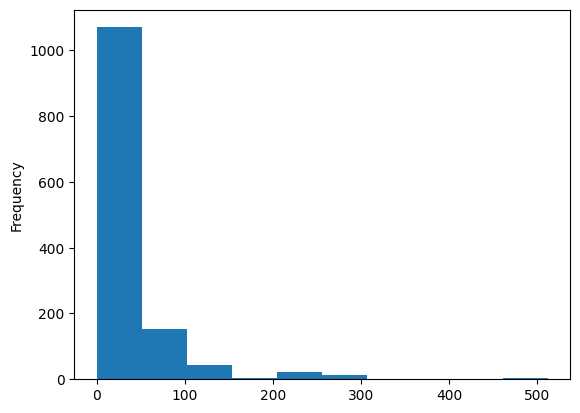

In [ ]:
df["fare"].plot(kind="hist")

<Axes: ylabel='Density'>

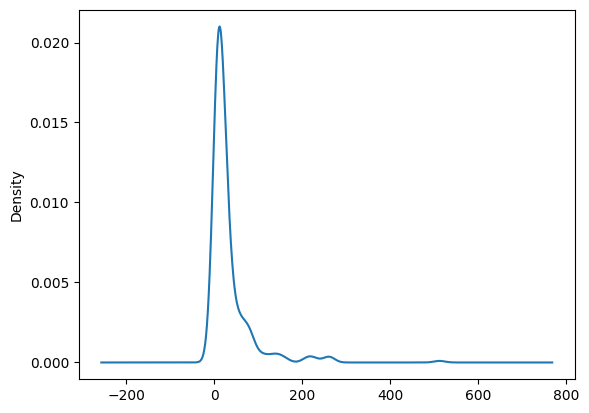

In [ ]:
df["fare"].plot(kind="kde")

In [ ]:
# qual a taxa de sobrevivência do titanic?

df["survived"].nunique()

2

In [ ]:
df["survived"].value_counts()

,count
survived,
0,809
1,500


In [ ]:
df["survived"].value_counts(normalize=True)

,proportion
survived,
0,0.618029
1,0.381971


In [ ]:
df["survived"].mean()

0.3819709702062643

**Pergunta: qual é proporção de homens/mulheres que morreram/sobreviveram?**

In [ ]:
df_male = df[df["sex"] == "male"]

df_male["survived"].value_counts(normalize=True)

,proportion
survived,
0,0.809015
1,0.190985


In [ ]:
df[df["sex"] == "male"]["survived"].value_counts(normalize=True)

,proportion
survived,
0,0.809015
1,0.190985


In [ ]:
df.query("sex == 'male'")["survived"].value_counts(normalize=True)

,proportion
survived,
0,0.809015
1,0.190985


In [ ]:
df.query("sex == 'male'")["survived"].mean()

0.19098457888493475

In [ ]:
df.query("sex == 'female'")["survived"].mean()

0.7274678111587983

**Pergunta: idem da anterior, mas com relação às classes?**

In [ ]:
df.query("sex == 'male' and pclass == 1")["survived"].mean()

0.3407821229050279

In [ ]:
df.query("sex == 'male' and pclass == 2")["survived"].mean()

0.14619883040935672

In [ ]:
df.query("sex == 'male' and pclass == 3")["survived"].mean()

0.15212981744421908

### Groupby

O .groupby() é um método super útil que nos ajuda a construir uma **tabela dinâmica** (pivot table) com os dados.

Esse tipo de estrutura nos ajuda muito a fazer a importante etapa de **olhar pros dados**

Vamos usar esta estrutura para responder a pergunta acima!

Precisamos de uma **função de agregação**, que é qual a função que vamos aplicar aos dados agrupados.

Eu quero olhar pros valores da coluna "Survived", agrupados por "Pclass" e "Sex".

Mas que função de agregação usar?

Como a coluna "Survived" tem apenas valores binários 1 e 0, eu posso usar a média!

Ex: [1 0 0 0 0 1 1], média: 3/7 = 42.85%. Ou seja, 42.86% sobreviveram, e 57.14% morreram

In [ ]:
df.groupby(["pclass", "sex"])["survived"].mean()

pclass  sex   
1       female    0.965278
        male      0.340782
2       female    0.886792
        male      0.146199
3       female    0.490741
        male      0.152130
Name: survived, dtype: float64

In [ ]:
df.groupby(["pclass", "sex"])[["survived"]].mean()

survived
pclass sex             
1      female  0.965278
       male    0.340782
2      female  0.886792
       male    0.146199
3      female  0.490741
       male    0.152130

In [ ]:
df.groupby(["pclass", "sex"])[["survived"]].std()

survived
pclass sex             
1      female  0.183714
       male    0.475302
2      female  0.318352
       male    0.354343
3      female  0.501076
       male    0.359511

In [ ]:
df.groupby(["pclass", "sex"])[["survived"]].agg(["mean", "min", "max", "std"])

survived                  
                   mean min max       std
pclass sex                               
1      female  0.965278   0   1  0.183714
       male    0.340782   0   1  0.475302
2      female  0.886792   0   1  0.318352
       male    0.146199   0   1  0.354343
3      female  0.490741   0   1  0.501076
       male    0.152130   0   1  0.359511

In [ ]:
df.groupby(["pclass", "sex"])[["fare"]].agg(["mean", "min", "max", "std"])

fare                            
                     mean    min       max        std
pclass sex                                           
1      female  109.412385  25.70  512.3292  82.885854
       male     69.888385   0.00  512.3292  74.079427
2      female   23.234827  10.50   65.0000  11.239817
       male     19.904946   0.00   73.5000  14.775149
3      female   15.324250   6.75   69.5500  11.786512
       male     12.415462   0.00   69.5500  11.261638

Também é possível fazer uma pivot table através da função **pd.pivot_table()**

In [ ]:
df.groupby(["pclass", "sex"])[["survived"]].mean()

survived
pclass sex             
1      female  0.965278
       male    0.340782
2      female  0.886792
       male    0.146199
3      female  0.490741
       male    0.152130

In [ ]:
pd.pivot_table(df, "survived", "pclass", "sex", aggfunc=["mean", "std"])

mean                 std          
sex       female      male    female      male
pclass                                        
1       0.965278  0.340782  0.183714  0.475302
2       0.886792  0.146199  0.318352  0.354343
3       0.490741  0.152130  0.501076  0.359511

In [ ]:
df.groupby(["pclass", "sex"])[["fare"]].agg(["mean", "min", "max", "std"])

fare                            
                     mean    min       max        std
pclass sex                                           
1      female  109.412385  25.70  512.3292  82.885854
       male     69.888385   0.00  512.3292  74.079427
2      female   23.234827  10.50   65.0000  11.239817
       male     19.904946   0.00   73.5000  14.775149
3      female   15.324250   6.75   69.5500  11.786512
       male     12.415462   0.00   69.5500  11.261638

In [ ]:
pd.pivot_table(df, "fare", "pclass", "sex", aggfunc=["mean", "min", "max", "std"])

mean               min            max                  std  \
sex         female       male female male    female      male     female   
pclass                                                                     
1       109.412385  69.888385  25.70  0.0  512.3292  512.3292  82.885854   
2        23.234827  19.904946  10.50  0.0   65.0000   73.5000  11.239817   
3        15.324250  12.415462   6.75  0.0   69.5500   69.5500  11.786512   

                   
sex          male  
pclass             
1       74.079427  
2       14.775149  
3       11.261638

Outra pergunta: **qual a relação entre o porto de embarque, a taxa de sobrevivência, e a classe?**

In [ ]:
df["embarked"].value_counts()

,count
embarked,
S,914
C,270
Q,123


In [ ]:
df.groupby(["pclass", "embarked"])[["survived"]].agg(["mean", "count"])

survived      
                     mean count
pclass embarked                
1      C         0.687943   141
       Q         0.666667     3
       S         0.559322   177
2      C         0.571429    28
       Q         0.285714     7
       S         0.417355   242
3      C         0.366337   101
       Q         0.353982   113
       S         0.210101   495

___
___
___

Vamos explorar um pouco mais!

Em particular, vamos responder a pergunta do problema gerador:

## *Mulheres e crianças sobreviveram mais?*

In [ ]:
# quantas pessoas morreram? Quantas sobreviveram?

df["survived"].value_counts()

,count
survived,
0,809
1,500


In [ ]:
# qual a proporção de sobreviventes e mortos?

df["survived"].value_counts(normalize=True)

,proportion
survived,
0,0.618029
1,0.381971


In [ ]:
# qual a quantidade de pessoas de casa sexo que morreu e sobreviveu?

df.groupby("sex")[["survived"]].mean()

,survived
sex,
female,0.727468
male,0.190985


In [ ]:
# modifique o groupby que fizemos acima do porto e classe pra incluir também o sexo como agrupador
# esse dataframe dá uma visão bem completa!

df.groupby(["sex", "embarked", "pclass"])[["survived"]].mean()

survived
sex    embarked pclass          
female C        1       0.971831
                2       1.000000
                3       0.709677
       Q        1       1.000000
                2       1.000000
                3       0.589286
       S        1       0.956522
                2       0.870968
                3       0.395349
male   C        1       0.400000
                2       0.294118
                3       0.214286
       Q        1       0.000000
                2       0.000000
                3       0.122807
       S        1       0.305556
                2       0.134228
                3       0.144809

In [ ]:
df.groupby(["sex", "embarked", "pclass"])[["survived", "fare"]].agg(["mean", "count"])

survived              fare      
                            mean count        mean count
sex    embarked pclass                                  
female C        1       0.971831    71  118.895949    71
                2       1.000000    11   27.003791    11
                3       0.709677    31   13.834545    31
       Q        1       1.000000     2   90.000000     2
                2       1.000000     2   12.350000     2
                3       0.589286    56    9.791968    56
       S        1       0.956522    69  101.069145    69
                2       0.870968    93   23.023118    93
                3       0.395349   129   18.083851   129
male   C        1       0.400000    70   94.622560    70
                2       0.294118    17   20.904406    17
                3       0.214286    70    9.775901    70
       Q        1       0.000000     1   90.000000     1
                2       0.000000     5   11.489160     5
                3       0.122807    57   10.979167    57
       S        1       0.305556   108   53.670756   108
                2       0.134228   149   20.073322   149
                3       0.144809   366   13.145977   365

In [ ]:
# agrupe agora por porto, classe, sexo e survived, e pegue as contagens de "survived"
# essa análise também dá uma visão interessante do perfil dos passageiros

df.groupby(["sex", "embarked", "pclass", "survived"])[["survived"]].agg(["count"])

survived
                                   count
sex    embarked pclass survived         
female C        1      0               2
                       1              69
                2      1              11
                3      0               9
                       1              22
       Q        1      1               2
                2      1               2
                3      0              23
                       1              33
       S        1      0               3
                       1              66
                2      0              12
                       1              81
                3      0              78
                       1              51
male   C        1      0              42
                       1              28
                2      0              12
                       1               5
                3      0              55
                       1              15
       Q        1      0               1
                2      0               5
                3      0              50
                       1               7
       S        1      0              75
                       1              33
                2      0             129
                       1              20
                3      0             313
                       1              53

In [ ]:
# inclua idade na análise

df["age"].nunique()

98

In [ ]:
df.groupby(["sex", "embarked", "pclass", "age"])[["survived"]].agg(["mean", "count"])

survived      
                                mean count
sex    embarked pclass age                
female C        1      16.0      1.0     1
                       17.0      1.0     1
                       18.0      1.0     2
                       19.0      1.0     1
                       21.0      1.0     1
...                              ...   ...
male   S        3      55.5      0.0     1
                       59.0      0.0     1
                       60.5      0.0     1
                       61.0      0.0     1
                       74.0      0.0     1

[468 rows x 2 columns]

In [ ]:
df.groupby(["sex", "pclass"])[["age"]].agg(["mean", "count"])

age      
                    mean count
sex    pclass                 
female 1       37.037594   133
       2       27.499191   103
       3       22.185307   152
male   1       41.029250   151
       2       30.815401   158
       3       25.962273   349

In [ ]:
df.groupby(["survived", "sex", "pclass"])[["age"]].agg(["mean", "count"])

age      
                             mean count
survived sex    pclass                 
0        female 1       35.200000     5
                2       34.090909    11
                3       23.418750    80
         male   1       43.658163    98
                2       33.092593   135
                3       26.679598   290
1        female 1       37.109375   128
                2       26.711051    92
                3       20.814815    72
         male   1       36.168240    53
                2       17.449274    23
                3       22.436441    59

Podemos criar algumas novas variáveis também!

Como queremos fazer uma análise de idade, seria legal se criássemos uma coluna de **faixa etária**, não é mesmo?

Para isso, vamos conhecer o importante método `apply()`:

### Método `apply()`

Esse método é extremamente útil para **modificar colunas** ou **criar novas colunas a partir de colunas antigas**.

O que ele faz é muito simples: **aplica uma função a todos os valores de uma série!**

In [ ]:
df["age"][1305]

nan

In [ ]:
df["age"][1305] == "nan"

False

In [ ]:
np.isnan(df["age"][1305])

True

In [ ]:
idade = 20

def calc_faixa_etaria(idade):

    if np.isnan(idade):
        return "desconnhecida"
    elif idade <= 15:
        return "0-15"
    elif idade <= 30:
        return "15-30"
    elif idade <= 45:
        return "30-45"
    else:
        return "45+"

In [ ]:
calc_faixa_etaria(6)

'0-15'

In [ ]:
df["age"].isnull().sum()

263

In [ ]:
df["age"]

,age
0,29.0000
1,0.9167
2,2.0000
3,30.0000
4,25.0000
...,...
1304,14.5000
1305,NaN
1306,26.5000
1307,27.0000


In [ ]:
# quantos passageiros há em cada faixa etária? (0-15, 15-30, 30-45, 45+) (fechado superior, aberto inferior)

df["age_group"] = df["age"].apply(calc_faixa_etaria)

In [ ]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",15-30
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0-15
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0-15
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",15-30
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",15-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0-15
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,desconnhecida
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,15-30
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,15-30


In [ ]:
df["age_group"].value_counts()

,count
age_group,
15-30,494
30-45,282
desconnhecida,263
45+,155
0-15,115


Agora podemos responder algumas outras perguntas:

In [ ]:
# quantos passageiros há em cada faixa etária? (0-15, 15-30, 30-45, 45+)

df["age_group"].value_counts()

,count
age_group,
15-30,494
30-45,282
desconnhecida,263
45+,155
0-15,115


In [ ]:
# e qual a distribuição de sexo dentro de cada faixa etária?

df.groupby(["age_group", "sex"])[["sex"]].count()

sex
age_group     sex        
0-15          female   56
              male     59
15-30         female  179
              male    315
30-45         female  101
              male    181
45+           female   52
              male    103
desconnhecida female   78
              male    185

Note que agora fica muito mais fácil responder às perguntas que respondemos antes com filtros:

In [ ]:
df.groupby(["age"])[["survived"]].mean()

,survived
age,
0.1667,1.000000
0.3333,0.000000
0.4167,1.000000
0.6667,1.000000
0.7500,0.666667
...,...
70.5000,0.000000
71.0000,0.000000
74.0000,0.000000


In [ ]:
# e qual a proporção de mortes/sobrevivência dentro de cada faixa etária?

df.groupby(["age_group"])[["survived"]].agg(["mean", "count"])

survived      
                   mean count
age_group                    
0-15           0.573913   115
15-30          0.368421   494
30-45          0.414894   282
45+            0.400000   155
desconnhecida  0.277567   263

In [ ]:
df.groupby(["age_group", "sex"])[["survived"]].agg(["mean", "count"])

survived      
                          mean count
age_group     sex                   
0-15          female  0.660714    56
              male    0.491525    59
15-30         female  0.720670   179
              male    0.168254   315
30-45         female  0.792079   101
              male    0.204420   181
45+           female  0.884615    52
              male    0.155340   103
desconnhecida female  0.602564    78
              male    0.140541   185

In [ ]:
df.groupby(["age_group", "sex", "pclass"])[["survived"]].agg(["mean", "count"])

survived      
                                 mean count
age_group     sex    pclass                
0-15          female 1       0.666667     3
                     2       1.000000    16
                     3       0.513514    37
              male   1       1.000000     5
                     2       0.916667    12
                     3       0.309524    42
15-30         female 1       0.978261    46
                     2       0.862745    51
                     3       0.487805    82
              male   1       0.371429    35
                     2       0.090909    77
                     3       0.162562   203
30-45         female 1       0.977778    45
                     2       0.925926    27
                     3       0.379310    29
              male   1       0.416667    48
                     2       0.086957    46
                     3       0.149425    87
45+           female 1       0.948718    39
                     2       0.777778     9
                     3       0.500000     4
              male   1       0.238095    63
                     2       0.043478    23
                     3       0.000000    17
desconnhecida female 1       1.000000    11
                     2       0.666667     3
                     3       0.531250    64
              male   1       0.285714    28
                     2       0.153846    13
                     3       0.111111   144

___
___
___

Agora que conhecemos o apply, vamos trabalhar com a coluna de nomes, que até agora não usamos, mas que pode conter informações importantes...

Primeiramente, vamos dar uma olhada na coluna de nomes:

In [ ]:
df["name"]

,name
0,"Allen, Miss. Elisabeth Walton"
1,"Allison, Master. Hudson Trevor"
2,"Allison, Miss. Helen Loraine"
3,"Allison, Mr. Hudson Joshua Creighton"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"
...,...
1304,"Zabour, Miss. Hileni"
1305,"Zabour, Miss. Thamine"
1306,"Zakarian, Mr. Mapriededer"
1307,"Zakarian, Mr. Ortin"


Note que a estrutura dos nomes é:

**Sobrenome, Título. Primeiros Nomes**

Será que conseguimos extrair uma coluna **só com os sobrenomes?**

E outra coluna **só com os títulos?**

Vamos ver...

In [ ]:
string = "Sobrenome, Título. Primeiros Nomes"

string

'Sobrenome, Título. Primeiros Nomes'

In [ ]:
string.split(", ")[0]

'Sobrenome'

In [ ]:
string.split(", ")[1].split(". ")[0]

'Título'

In [ ]:
def extrai_sobrenome(s):

    return s.split(", ")[0]

In [ ]:
df["surname"] = df["name"].apply(extrai_sobrenome)

In [ ]:
def extrai_titulo(s):

    return s.split(", ")[1].split(". ")[0]

In [ ]:
df["title"] = df["name"].apply(extrai_titulo)

In [ ]:
(lambda x: 2*x)(5)

10

In [ ]:
df["name"].apply(extrai_titulo)

,name
0,Miss
1,Master
2,Miss
3,Mr
4,Mrs
...,...
1304,Miss
1305,Miss
1306,Mr
1307,Mr


In [ ]:
df["name"].apply(lambda x: x.split(", ")[1].split(". ")[0])

,name
0,Miss
1,Master
2,Miss
3,Mr
4,Mrs
...,...
1304,Miss
1305,Miss
1306,Mr
1307,Mr


Parece que funcionou!

Agora, como podemos **aplicar** esse mesmo procedimento simultaneamente a todos os elementos da coluna de nomes?

Fazemos isso com o método `apply()`.

Podemos definir uma função que faz o que queremos, ou então, de forma mais simples, usar **funções lambda**!

Basta pegar a ação que fizemos (que é essencialmente o ".split(",")[0]"), e passar pra função lambda dentro do apply:

Note que foi retornada uma outra série, mas dessa vez apenas com os sobrenomes!

Podemos fazer com que essa série se torne uma nova coluna do df:


In [ ]:
# utilizando o apply pra criar colunas de titulo e sobrenome (veja acima!!)

df["surname"] = df["name"].apply(extrai_sobrenome)
df["title"] = df["name"].apply(extrai_titulo)

In [ ]:
df[["surname","title"]]

,surname,title
0,Allen,Miss
1,Allison,Master
2,Allison,Miss
3,Allison,Mr
4,Allison,Mrs
...,...,...
1304,Zabour,Miss
1305,Zabour,Miss
1306,Zakarian,Mr
1307,Zakarian,Mr


In [ ]:
df["name"].nunique()

1307

In [ ]:
df["surname"].nunique()

875

In [ ]:
df["surname"].value_counts()

,count
surname,
Andersson,11
Sage,11
Goodwin,8
Asplund,8
Davies,7
...,...
Myles,1
Nesson,1
Nicholls,1


In [ ]:
df["surname"].value_counts().values

array([11, 11,  8,  8,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  5,  5,  5,
        5,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [ ]:
df["surname"].value_counts().value_counts()

,count
count,
1,637
2,133
3,63
4,22
6,9
5,6
11,2
8,2
7,1


In [ ]:
df["title"].nunique()

18

In [ ]:
df["title"].value_counts()

,count
title,
Mr,757
Miss,260
Mrs,197
Master,61
Rev,8
Dr,8
Col,4
Mlle,2
Ms,2


In [ ]:
df[df["title"] == "Jonkheer"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group,surname,title
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,NaN,NaN,"Rotterdam, Netherlands",30-45,Reuchlin,Jonkheer


In [ ]:
df[~df["title"].isin(["Mr", "Miss", "Mrs", "Master", "Rev", "Dr", "Col"])]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group,surname,title
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",15-30,Aubart,Mme
45,1,0,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,NaN,NaN,"Washington, DC",30-45,Butt,Major
81,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,NaN,269.0,"Milwaukee, WI",45+,Crosby,Capt
99,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1,NaN,London / Paris,45+,Duff Gordon,Lady
100,1,1,"Duff Gordon, Sir. Cosmo Edmund ('Mr Morgan')",male,49.0,1,0,PC 17485,56.9292,A20,C,1,NaN,London / Paris,45+,Duff Gordon,Sir
199,1,1,"Mayne, Mlle. Berthe Antonine ('Mrs de Villiers')",female,24.0,0,0,PC 17482,49.5042,C90,C,6,NaN,"Belgium Montreal, PQ",15-30,Mayne,Mlle
218,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,8,NaN,NaN,30-45,Oliva y Ocana,Dona
231,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,6,NaN,"Toronto, ON",45+,Peuchen,Major
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,NaN,NaN,"Rotterdam, Netherlands",30-45,Reuchlin,Jonkheer
245,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S,8,NaN,"London Vancouver, BC",30-45,Rothes,the Countess


Essas pessoas existiram!

<a href=https://en.wikipedia.org/wiki/Manuel_Uruchurtu_Ram%C3%ADrez>Manuel Uruchurtu</a>

<a href=https://www.encyclopedia-titanica.org/titanic-victim/edward-gifford-crosby.html>Edward Crosby</a>

<a href=https://www.themarysue.com/the-countess-of-rothes/>Countess of Rothes</a>

Vamos ver alguns religiosos...

In [ ]:
df[df["title"] == "Rev"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group,surname,title
335,2,0,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,NaN,S,NaN,174.0,"Jacksonville, FL",45+,Bateman,Rev
357,2,0,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,NaN,S,NaN,NaN,London,30-45,Byles,Rev
366,2,0,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,NaN,S,NaN,NaN,London,45+,Carter,Rev
431,2,0,"Harper, Rev. John",male,28.0,0,1,248727,33.000,NaN,S,NaN,NaN,"Denmark Hill, Surrey / Chicago",15-30,Harper,Rev
472,2,0,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q,NaN,NaN,"Glasgow / Bangor, ME",45+,Kirkland,Rev
476,2,0,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.000,NaN,S,NaN,NaN,"Minneapolis, MN",15-30,Lahtinen,Rev
507,2,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,NaN,NaN,"Worcester, MA",15-30,Montvila,Rev
532,2,0,"Peruschitz, Rev. Joseph Maria",male,41.0,0,0,237393,13.000,NaN,S,NaN,NaN,NaN,30-45,Peruschitz,Rev


Este processo que fizemos é o chamado **feature engineering**, que consiste em utilizar features originais (nome) para criar **novas features** que possivelment podem ser mais úteis que a feature original.

Isto é, o nome completo de uma pessoa, pode não ser um indicativo tão forte da morte/sobrevivência... Mas o título, pode ser que seja!

_______

## *Rose e Jack estão na base?*

In [ ]:
# selecionar todas as Roses da base

df[df["name"].apply(lambda x: "Rose" in x)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group,surname,title
242,1,1,"Rosenbaum, Miss. Edith Louise",female,33.0,0,0,PC 17613,27.7208,A11,C,11,NaN,"Paris, France",30-45,Rosenbaum,Miss
243,1,0,"Rosenshine, Mr. George ('Mr George Thorne')",male,46.0,0,0,PC 17585,79.2000,NaN,C,NaN,16.0,"New York, NY",45+,Rosenshine,Mr
612,3,1,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,13,NaN,"London, England Norfolk, VA",15-30,Aks,Mrs


In [ ]:
df[df["name"].apply(lambda x: "Jack" in x)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group,surname,title
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,NaN,NaN,"Philadelphia, PA",desconnhecida,Brewe,Dr


In [ ]:
df.query("sex == 'female' and pclass == 1 and 17 <= age <= 20")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group,surname,title
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",15-30,Astor,Mrs
27,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C,7,NaN,"Dowagiac, MI",15-30,Bishop,Mrs
92,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S,3,NaN,"Calgary, AB",15-30,Dick,Mrs
137,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3,NaN,"Greenwich, CT",15-30,Graham,Miss
198,1,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18.0,1,0,113773,53.1000,D30,S,10,NaN,"New York, NY",15-30,Marvin,Mrs
216,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S,5,NaN,"New York, NY",15-30,Newsom,Miss
229,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C,8,NaN,"Madrid, Spain",15-30,Penasco y Castellana,Mrs
250,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY",15-30,Ryerson,Miss
270,1,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18.0,1,0,13695,60.0000,C31,S,6,NaN,"Huntington, WV",15-30,Smith,Mrs
289,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S,8,NaN,"New York, NY",15-30,Taussig,Miss


____

Agora que terminamos de processar a base, seria interessante salvá-la para que não perdêssesmos as alteracões que fizemos.

O pandas permite salvar os arquivos com uma única linha de código!

In [ ]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group,surname,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",15-30,Allen,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0-15,Allison,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0-15,Allison,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",15-30,Allison,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",15-30,Allison,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0-15,Zabour,Miss
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,desconnhecida,Zabour,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,15-30,Zakarian,Mr
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,15-30,Zakarian,Mr


Para salvar o arquivo em formato ".csv":

In [ ]:
df.to_csv("titanic_processada.csv", index=False)

Se quiser salvar como um arquivo de excel:

In [ ]:
df.to_excel("titanic_processada.xlsx")

___


______
_____
___